In [19]:
import pandas as pd
import numpy as np

In [20]:
data=pd.read_csv("https://query.data.world/s/r2l4lq3fhcy3f2p3kxgr6owwso4n3l?dws=00000")
data.head()

,Year,Region,Race or Ethnicity,Sex,Age Group,Firearm Deaths,Alcohol-Related Deaths,Suicide Deaths
0,2017,NYC,White Non Hispanic,F,<1,0,0,0
1,2017,ROS,White Non Hispanic,M,Total,349,1751,770
2,2017,ROS,White Non Hispanic,F,Total,36,797,205
3,2017,ROS,White Non Hispanic,M,<1,0,0,0
4,2017,ROS,White Non Hispanic,F,<1,0,0,0


In [21]:
data.shape

(2076, 8)

In [22]:
data.isna().sum()/data.shape[0]*100

Year                      0.0
Region                    0.0
Race or Ethnicity         0.0
Sex                       0.0
Age Group                 0.0
Firearm Deaths            0.0
Alcohol-Related Deaths    0.0
Suicide Deaths            0.0
dtype: float64

In [23]:
data.dtypes

Year                       int64
Region                    object
Race or Ethnicity         object
Sex                       object
Age Group                 object
Firearm Deaths             int64
Alcohol-Related Deaths     int64
Suicide Deaths             int64
dtype: object

In [24]:
columns=data.select_dtypes("object").columns
for col in columns:
  print(data[col].unique())

['NYC' 'ROS']
['White Non Hispanic' 'Other Non Hispanic' 'Not Stated' 'Hispanic'
 'Black Non Hispanic']
['F' 'M']
['<1' 'Total' '85+' '75-84' '65-74' '55-64' '45-54' '35-44' '25-34'
 '20-24' '10-19' '1-9']


<ipython-input-25-456127d06f51>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data.corr())


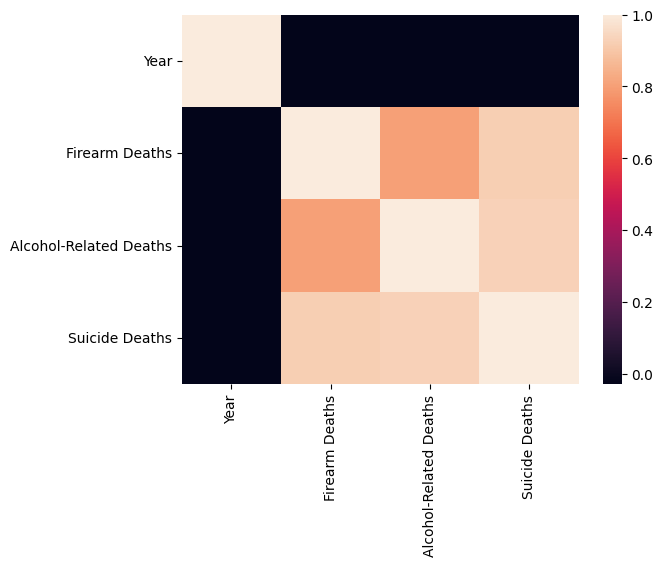

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(data.corr())
plt.show()

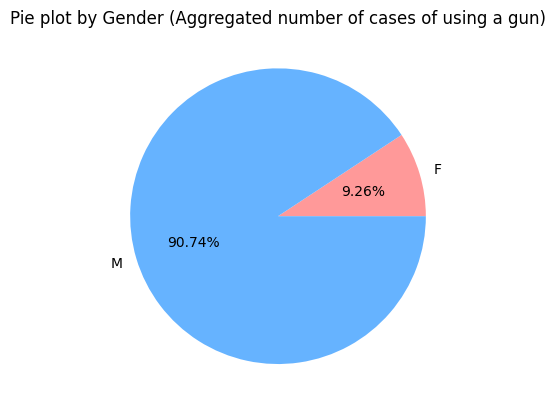

In [26]:
df=data
df_agg = df.groupby('Sex')['Firearm Deaths'].sum().reset_index()
colors = ['#ff9999', '#66b3ff']
plt.pie(df_agg['Firearm Deaths'], labels=df_agg['Sex'], autopct='%1.2f%%',colors=colors)
plt.title('Pie plot by Gender (Aggregated number of cases of using a gun)')
plt.show()

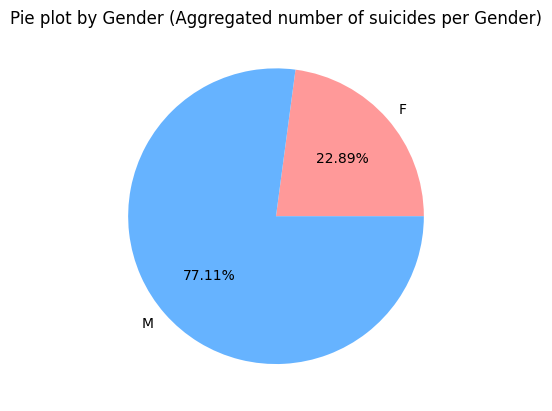

In [27]:
df_agg = df.groupby('Sex')['Suicide Deaths'].sum().reset_index()
colors = ['#ff9999', '#66b3ff']
plt.pie(df_agg['Suicide Deaths'], labels=df_agg['Sex'], autopct='%1.2f%%',colors=colors)
plt.title('Pie plot by Gender (Aggregated number of suicides per Gender)')
plt.show()

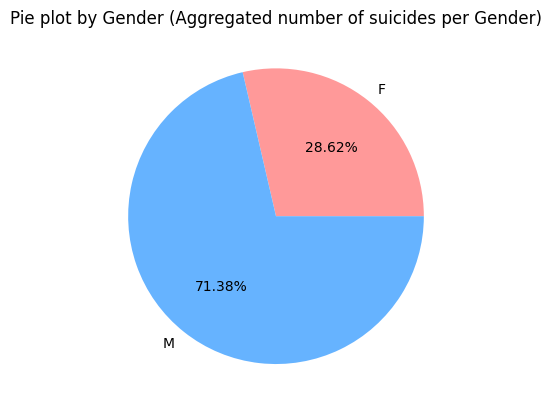

In [28]:
df_agg = df.groupby('Sex')['Alcohol-Related Deaths'].sum().reset_index()
colors = ['#ff9999', '#66b3ff']
plt.pie(df_agg['Alcohol-Related Deaths'], labels=df_agg['Sex'], autopct='%1.2f%%',colors=colors)
plt.title('Pie plot by Gender (Aggregated number of suicides per Gender)')
plt.show()

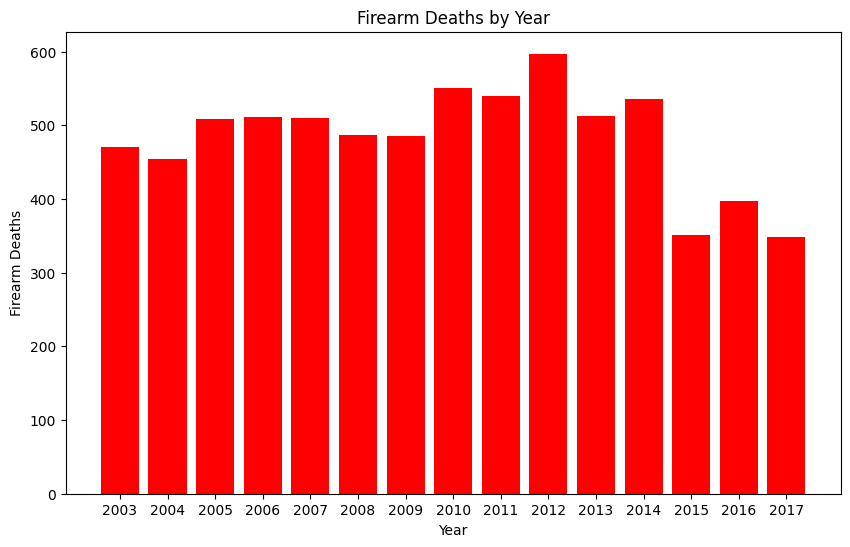

In [29]:
plt.figure(figsize=(10, 6))
plt.bar(df['Year'], df['Firearm Deaths'], color='red')
plt.xlabel('Year')
plt.ylabel('Firearm Deaths')
plt.title('Firearm Deaths by Year')
plt.xticks(df['Year'].unique())
plt.show()

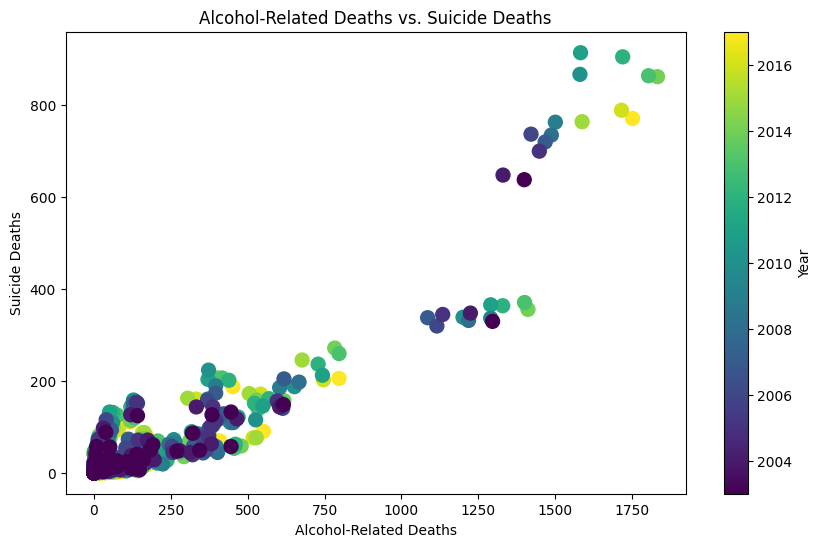

In [30]:
plt.figure(figsize=(10, 6))
plt.scatter(df['Alcohol-Related Deaths'], df['Suicide Deaths'], s=100, c=df['Year'])
plt.xlabel('Alcohol-Related Deaths')
plt.ylabel('Suicide Deaths')
plt.title('Alcohol-Related Deaths vs. Suicide Deaths')
plt.colorbar(label='Year')
plt.show()


<Axes: xlabel='Region', ylabel='count'>

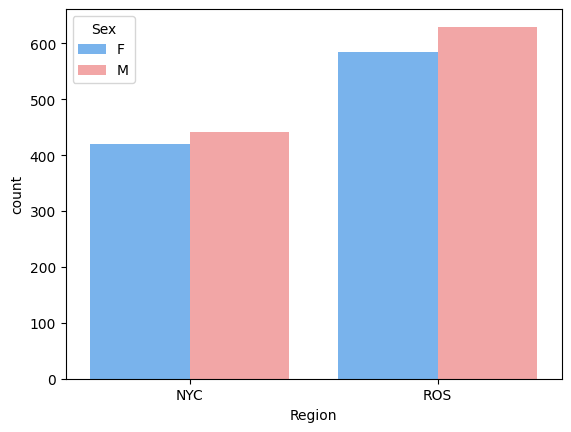

In [31]:
colors = {'M': '#ff9999', 'F': '#66b3ff'}
sns.countplot(x="Region",hue="Sex",data=data,palette=colors)

In [32]:
adults=['<1', 'Total', '85+' ,'75-84', '65-74' ,'55-64', '45-54' ,'35-44' ,'25-34']
teens=['20-24' ,'10-19' ,'1-9']
for i in range(len(data["Age Group"])):
  if data["Age Group"][i] in adults:
    data["Age Group"][i]="adult"
  else:
    data["Age Group"][i]="teen"
print(data["Age Group"].unique())

<ipython-input-32-a3a0675d9b2f>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Age Group"][i]="adult"
<ipython-input-32-a3a0675d9b2f>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Age Group"][i]="teen"


['adult' 'teen']


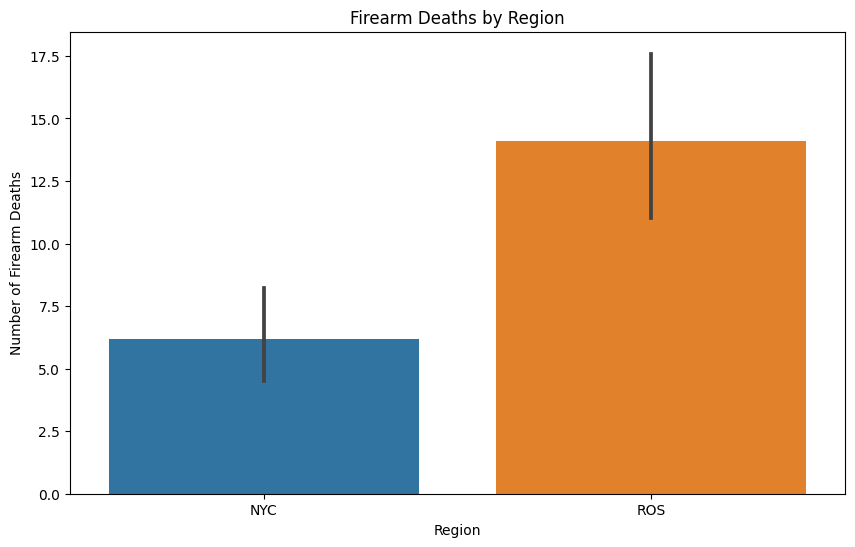

In [33]:
plt.figure(figsize=(10, 6))
sns.barplot(data=data, x='Region', y='Firearm Deaths')
plt.title('Firearm Deaths by Region')
plt.xlabel('Region')
plt.ylabel('Number of Firearm Deaths')
plt.show()

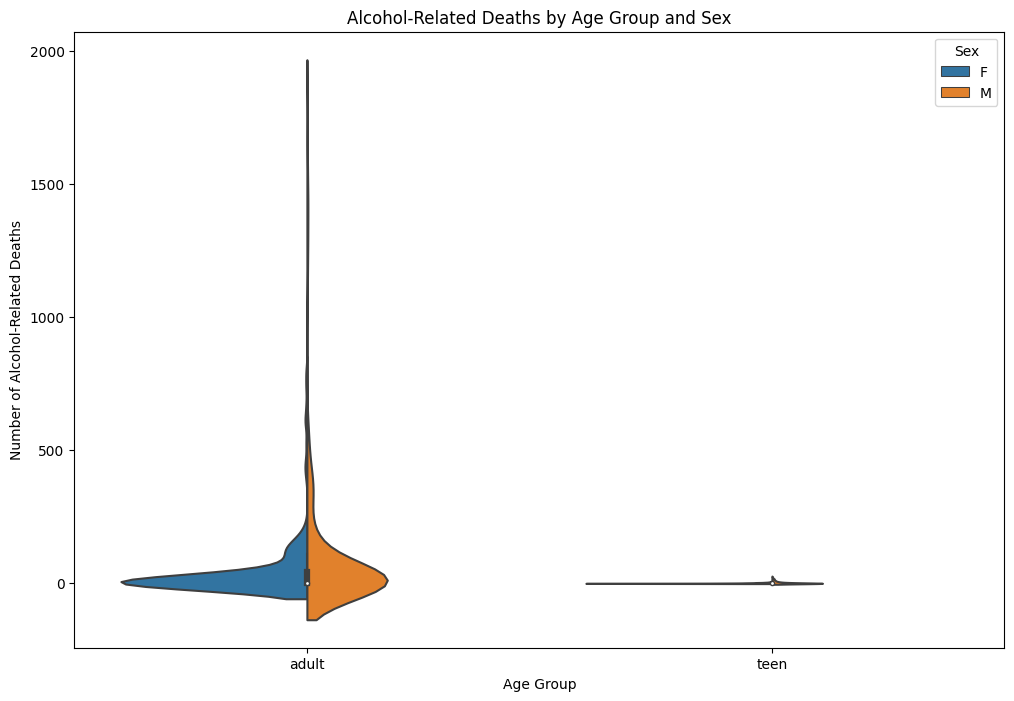

In [34]:
plt.figure(figsize=(12, 8))
sns.violinplot(data=data, x='Age Group', y='Alcohol-Related Deaths', hue='Sex', split=True)
plt.title('Alcohol-Related Deaths by Age Group and Sex')
plt.xlabel('Age Group')
plt.ylabel('Number of Alcohol-Related Deaths')
plt.legend(title='Sex')
plt.show()


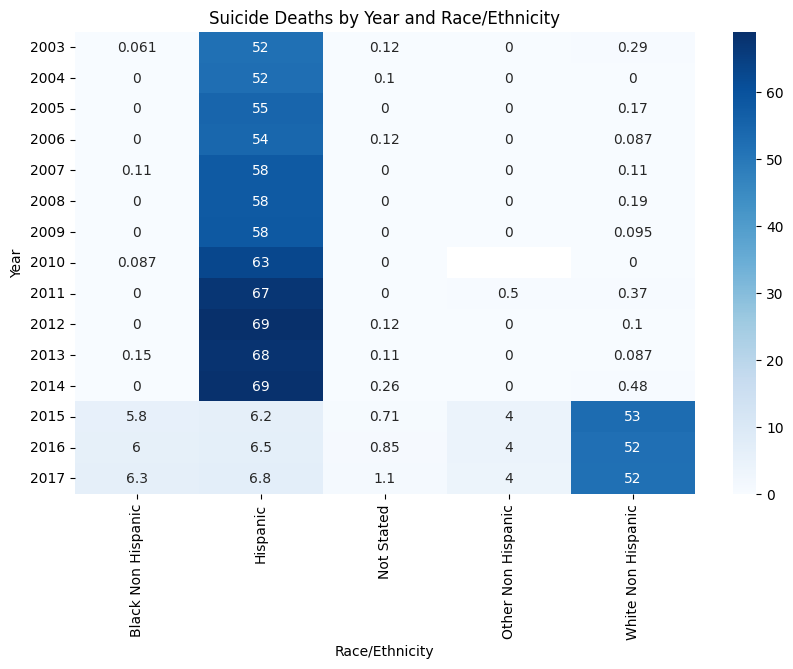

In [35]:
pivot_table = data.pivot_table(values='Suicide Deaths', index='Year', columns='Race or Ethnicity')
plt.figure(figsize=(10, 6))
sns.heatmap(data=pivot_table, annot=True, cmap='Blues')
plt.title('Suicide Deaths by Year and Race/Ethnicity')
plt.xlabel('Race/Ethnicity')
plt.ylabel('Year')
plt.show()

In [38]:
import plotly.express as px
import plotly.graph_objects as go

total_deaths = data[['Firearm Deaths', 'Alcohol-Related Deaths', 'Suicide Deaths']].sum()
fig = go.Figure()
fig.add_trace(go.Bar(
    x=total_deaths.index,
    y=total_deaths.values,
    marker=dict(color=['#FF5A5F', '#FFA05A', '#FFC15E']),
    hovertemplate='<b>%{x}</b><br>Total Deaths: %{y}',
))

fig.update_layout(
    title='Total Deaths by Category',
    xaxis_title='Category',
    yaxis_title='Total Deaths',
    showlegend=False
)
fig.show()

In [39]:
age_group_data = data.groupby('Age Group')[['Firearm Deaths', 'Alcohol-Related Deaths', 'Suicide Deaths']].sum()
fig = go.Figure()
categories = ['Firearm Deaths', 'Alcohol-Related Deaths', 'Suicide Deaths']
colors = ['#FF5A5F', '#FFA05A', '#FFC15E']
for i, category in enumerate(categories):
    fig.add_trace(go.Bar(
        x=age_group_data.index,
        y=age_group_data[category],
        name=category,
        marker=dict(color=colors[i])
    ))

fig.update_layout(
    title='Number of Deaths by Age Group',
    xaxis_title='Age Group',
    yaxis_title='Number of Deaths',
    legend_title='Category'
)

fig.show()